In [1]:
%run setup_env.py


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms.regressions.softmax import SoftmaxRegression
from algorithms.utils import plot_loss_history

In [3]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X.shape, X[0].shape

((150, 4), (4,))

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
model = SoftmaxRegression()
model.fit(X, y, epochs=10000, num_classes=3,batch_size=X.shape[0]//10)

Epoch 1/10000 => Loss: 13.706050009688818
Epoch 2/10000 => Loss: 16.83811193501679
Epoch 3/10000 => Loss: 11.19514278521481
Epoch 4/10000 => Loss: 9.303658351359582
Epoch 5/10000 => Loss: 9.420312701878292
Epoch 6/10000 => Loss: 9.998783034860399
Epoch 7/10000 => Loss: 14.034209312116431
Epoch 8/10000 => Loss: 9.55550395588883
Epoch 9/10000 => Loss: 11.324909816708978
Epoch 10/10000 => Loss: 8.734009456046175
Epoch 11/10000 => Loss: 10.437883387833308
Epoch 12/10000 => Loss: 8.318073272562913
Epoch 13/10000 => Loss: 9.51123628397659
Epoch 14/10000 => Loss: 7.9039475919312565
Epoch 15/10000 => Loss: 8.83891963826944
Epoch 16/10000 => Loss: 7.602091044012686
Epoch 17/10000 => Loss: 8.281792006586702
Epoch 18/10000 => Loss: 7.46658728913
Epoch 19/10000 => Loss: 7.760503924357406
Epoch 20/10000 => Loss: 7.3361057902216915
Epoch 21/10000 => Loss: 7.287274075553323
Epoch 22/10000 => Loss: 7.081255681545882
Epoch 23/10000 => Loss: 6.926374085318065
Epoch 24/10000 => Loss: 6.768405202387912
Ep

In [14]:
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

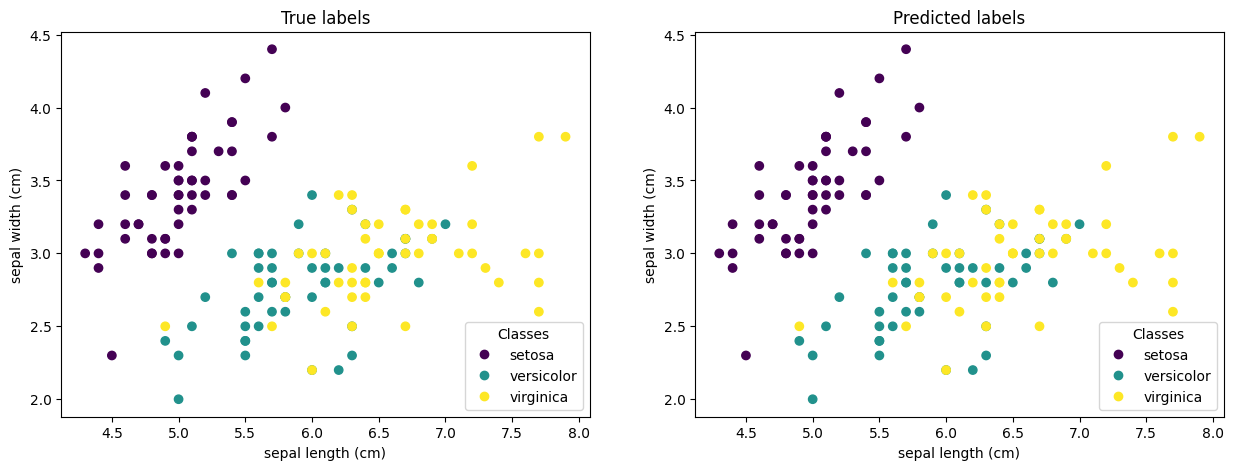

In [15]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
scatter = ax[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="True labels")
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

scatter2 = ax[1].scatter(iris.data[:, 0], iris.data[:, 1], c=predictions)
ax[1].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="Predicted labels")
_ = ax[1].legend(
    scatter2.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)